<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 4
#### Benjamín Ithurburu

Esta es una entrega parcial. Falta acomodar el código en el notebook

In [1]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 4.pdf", width=1000, height=1000)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import TransferFunction

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.sistemas_lineales import parametrize_sos, pzmap, GroupDelay, bodePlot, tfcascade
from pytc2.general import print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

#### Transferencia obtenida en función de alpha y beta

<IPython.core.display.Math object>

#### Transferencia obtenida con valores reemplazados

<IPython.core.display.Math object>

#### Transferencia obtenida con valores reemplazados

<IPython.core.display.Math object>

#### Transferencia obtenida con valores reemplazados

<IPython.core.display.Math object>

#### Transferencia obtenida con valores reemplazados

<IPython.core.display.Math object>

#### Transferencia obtenida con función signal.cheby1

#### Transferencia obtenida

<IPython.core.display.Math object>

#### Parámetros

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[(1.60000000000000, 2.56000000000000, 0.495000000000000)]
[(7.97820669456067, 0.132109888895031, 1.25196437925616)]


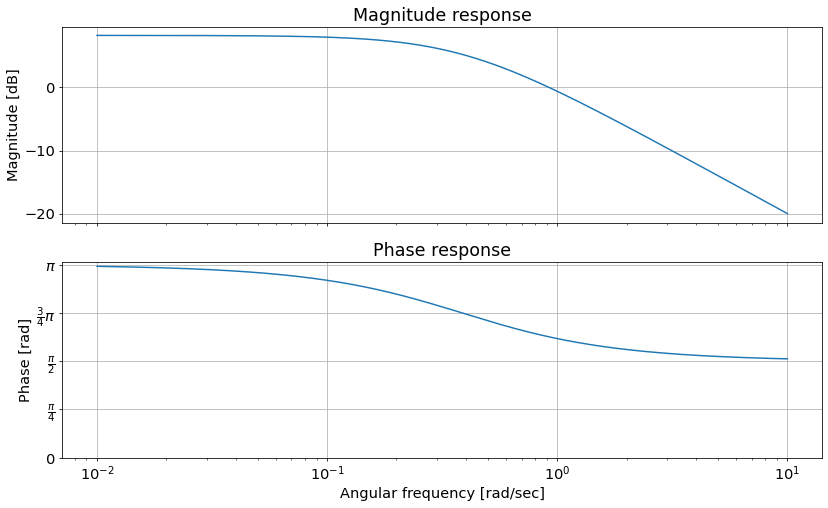

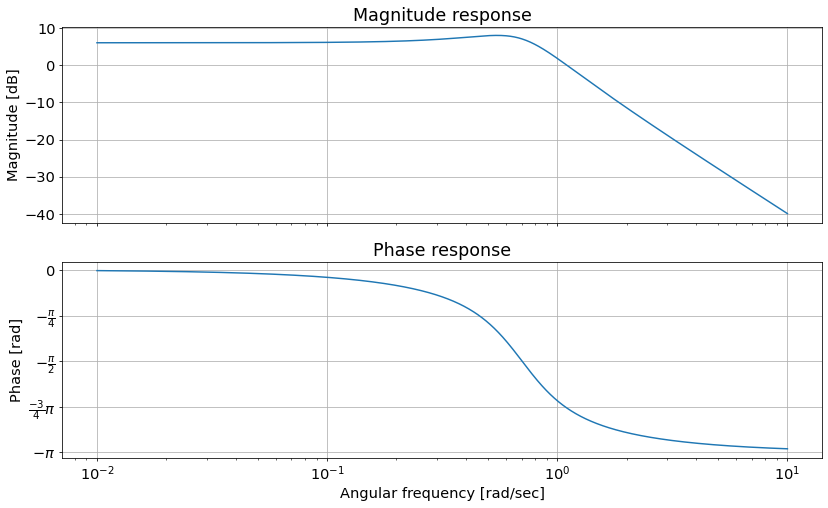

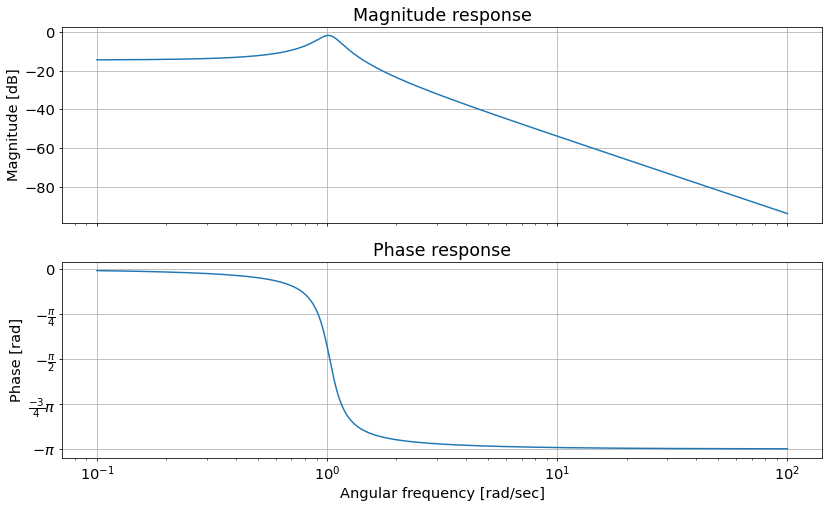

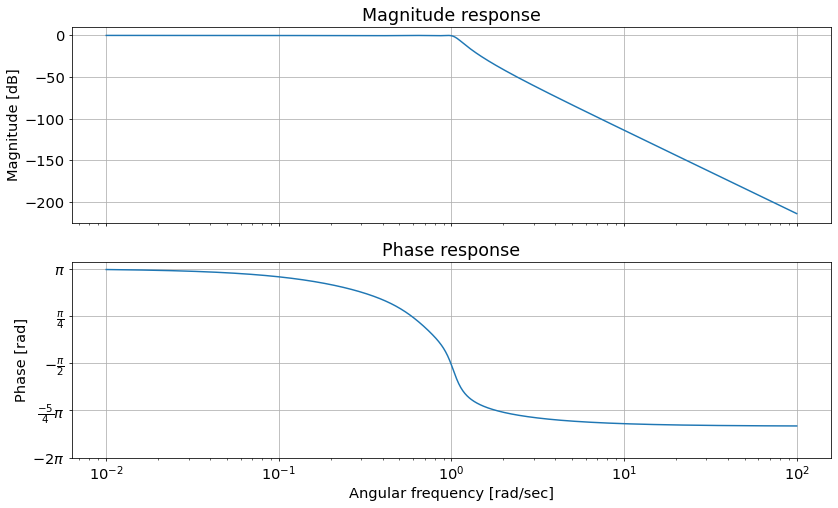

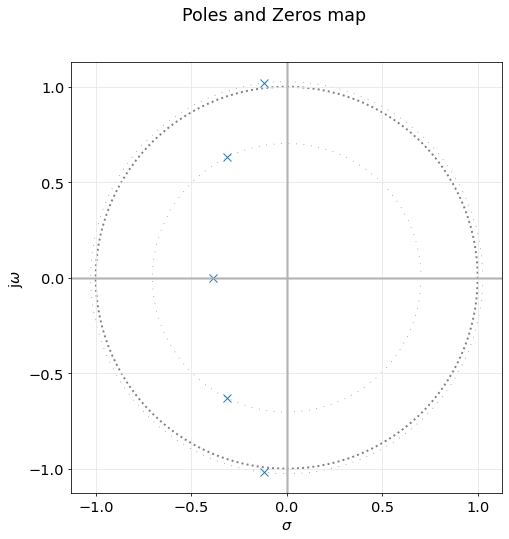

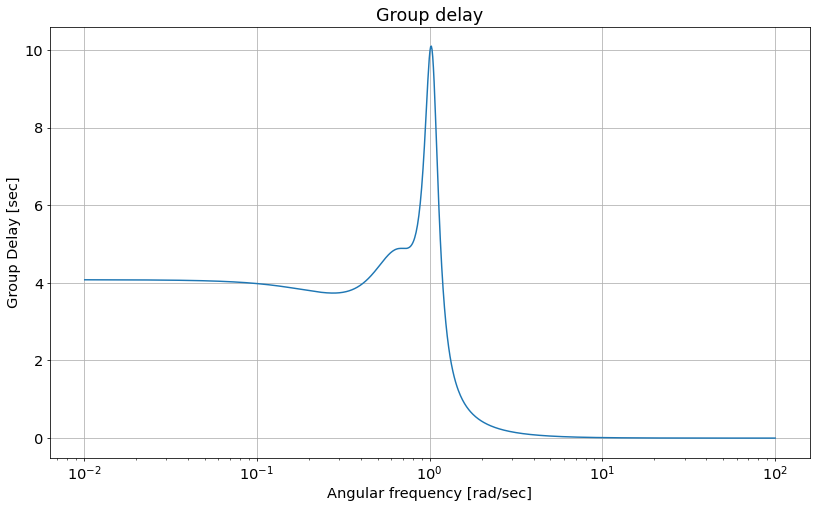

In [3]:
# alpha_min = 48 //valor requerido
alpha_max = 0.4
ee_2 = 10**(alpha_max/10)-1
ee = np.sqrt(ee_2)

fp = 300
fs = 900
wp = 2*np.pi*fp
ws = 2*np.pi*fs

wp_n = 1
ws_n = ws/wp

# Se itera n hasta que alpha sea mayor a alpha_min
n=3
alpha_min = 10*np.log10(1+ee_2*np.cosh(n*np.arccosh(ws_n))**2)

# Se obtienen las raices del denominador de |T(s)|**2
roots = np.roots([ 1 , 0 , 5/2 , 0 , 35/16 , 0 , 25/32 , 0 , 25/256 , 0 , -1/(256*ee_2) ])
                         
# Se obtienen los coeficientes de las transferencias a partir de las raices
# T1(s)
alpha1 = 0.38613502

# T2(s)
alpha2 = 0.31238979
beta2 = 0.63008283

2*alpha2 
alpha2**2 + beta2**2

# T3(s)
alpha3 = 0.11932228
beta3 = 1.01949544

2*alpha3 
alpha3**2 + beta3**2

# Simulación simbólica
## Definición de variables simbólicas
s = sp.symbols('s', complex=True)
a1, a2, a3 = sp.symbols("a1, a2, a3")
b2, b3 = sp.symbols("b2, b3")
epsilon = sp.symbols("e")

## Obtención de transferencia en función de alpha y beta
T1 = (-1)*1/(s + a1)
T2 = 1/(s**2 + 2*a2*s + (a2**2 + b2**2))
T3 = sp.sqrt(1/(256*epsilon**2))/(s**2 + 2*a3*s + (a3**2 + b3**2))

T = T1*T2*T3

num, den = sp.fraction(sp.simplify(sp.expand(T)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)
print_subtitle('Transferencia obtenida en función de alpha y beta')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num/den)) )


## Obtención de transferencia con reemplazo de valores obtenidos al calcular las raices
a1, a2, a3 = [0.38613502, 0.31238979, 0.11932228]
b2, b3 = [0.63008283, 1.01949544]
epsilon = ee
T1 = (-1)*1/(s + a1)
T2 = 1/(s**2 + 2*a2*s + (a2**2 + b2**2))
T3 = sp.sqrt(1/(256*epsilon**2))/(s**2 + 2*a3*s + (a3**2 + b3**2))

T = T1*T2*T3

##############################################################
#%%
# Cálculo y gráfico de transferencia T1 para comparación con circuito sintetizado y simulado en LTspice
num1, den1 = sp.fraction(sp.simplify(sp.expand(T1)))
num1 = sp.Poly(num1,s)
den1 = sp.Poly(den1,s)
print_subtitle('Transferencia obtenida con valores reemplazados')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num1/den1)) )

num11 = np.float64(num1.all_coeffs())
den11 = np.float64(den1.all_coeffs())
my_tf1 = TransferFunction(num11, den11)
# Gráfico Bode
bodePlot(my_tf1, fig_id=1)
#%%
# Cálculo y gráfico de transferencia T2 para comparación con circuito sintetizado y simulado en LTspice
num2, den2 = sp.fraction(sp.simplify(sp.expand(T2)))
num2 = sp.Poly(num2,s)
den2 = sp.Poly(den2,s)
print_subtitle('Transferencia obtenida con valores reemplazados')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num2/den2)) )

num22 = np.float64(num2.all_coeffs())
den22 = np.float64(den2.all_coeffs())
my_tf2 = TransferFunction(num22, den22)
# Gráfico Bode
bodePlot(my_tf2, fig_id=2)
#%%
# Cálculo y gráfico de transferencia T3 para comparación con circuito sintetizado y simulado en LTspice
num3, den3 = sp.fraction(sp.simplify(sp.expand(T3)))
num3 = sp.Poly(num3,s)
den3 = sp.Poly(den3,s)
print_subtitle('Transferencia obtenida con valores reemplazados')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num3/den3)) )

num33 = np.float64(num3.all_coeffs())
den33 = np.float64(den3.all_coeffs())
my_tf3 = TransferFunction(num33, den33)
# Gráfico Bode
bodePlot(my_tf3, fig_id=3)

##############################################################
#%%
# Cálculo y gráfico de transferencia total T=T1*T2*T3
num, den = sp.fraction(sp.simplify(sp.expand(T)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)

print_subtitle('Transferencia obtenida con valores reemplazados')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(num/den)) )


## Verificación de transferencia obtenida con función cheby1
b, a = signal.cheby1(5, 0.4, 1, 'low', analog=True)
print_subtitle('Transferencia obtenida con función signal.cheby1')
tf_c5 = TransferFunction(b,a)

num1 = np.float64(num.all_coeffs())
den1 = np.float64(den.all_coeffs())
#Simulación numérica
my_tf = TransferFunction(num1, den1)
# Gráfico Bode
bodePlot(my_tf, fig_id=4)

# Gráfico de Polos y Ceros
pzmap(my_tf, fig_id=5)

# Group Delay
GroupDelay(my_tf, fig_id=6)

##############################################################
#%
# Datos para gráficos aproximados
roots1 = np.roots(den1)
angles1 = np.angle(roots1, deg=True)
mod1 = np.absolute(roots1)

##############################################################
#%%
# Obtención de transferencia del punto 4) por cálculo simbólico

# variables simbólicas
s = sp.symbols('s', complex=True)
Vin, V1, V2, V3, Va = sp.symbols("Vin, V1, V2, V3, Va")
G1, G2, G3, G4, G5, G6, C1, C2 = sp.symbols("G1, G2, G3, G4, G5, G6, C1, C2")

# Sistemas de ecuaciones del modelo ideal, negativamente realimentado
aa = sp.solve([
                V1*G1 + V2*s*C1, 
                V2*G2 + V3*s*C2,
                Va*(G3 + G4) - V1*G4 - V3*G3,
                Va*(G5 + G6) - Vin*G5 - V2*G6
                ], 
                [Vin, V1, V2, V3, Va])
T1 = aa[V3]/aa[Vin]

num, den = sp.fraction(sp.simplify(sp.expand(T1)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)

num1, den1, w_on, Q_n, w_od, Q_d, k = parametrize_sos(num, den)

print_subtitle('Transferencia obtenida')

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(k,num1/den1, evaluate=False)) ))

print_subtitle('Parámetros')

display(Math( r' k = ' + sp.latex(k) ))

display(Math( r' \omega_0 = ' + sp.latex(w_od) ))

display(Math( r' Q = ' + sp.latex(Q_d) ))
##############################################################
#%%
# Resolución de sistema de ecuaciones para T2
C, G2, G3 = sp.symbols("C, G2, G3")

bb = sp.solve([
                (1/G3)-(1/0.495),
                (G2*G3/(C**2))-0.495,
                (1/C)-0.625
                ],
                [C, G2, G3])
    
print(bb)
#%%
# Resolución de sistema de ecuaciones para T3
G2, G3, G6 = sp.symbols("G2, G3, G6")

cc = sp.solve([
                (2*G3/(G3+G6))-0.1909,
                (G2*G3)-1.054,
                (2*G3*G6/(G3+G6))-0.239
                ],
                [G2, G3, G6])
    
print(cc)